<a href="https://colab.research.google.com/github/fahimmiddya/Predicting-Stock-Price/blob/master/Predicting_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description : 
This program uses an artificial neural network known as LSTM(Long Short Term Memory) to predict the closing stock price of a corporation using the past 60 day stock price

In [1]:
# Importing the library
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
# Get the stock quote
df = web.DataReader('AAPL' , data_source='yahoo' , start = '2012-01-01' , end='2020-05-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-04-27,284.540009,279.950012,281.799988,283.170013,29271900.0,282.405548
2020-04-28,285.829987,278.200012,285.079987,278.579987,28001200.0,277.827911
2020-04-29,289.670013,283.890015,284.730011,287.730011,34320200.0,286.953247


In [3]:
## Get the number of rows and columns of our data set.
df.shape

(2096, 6)

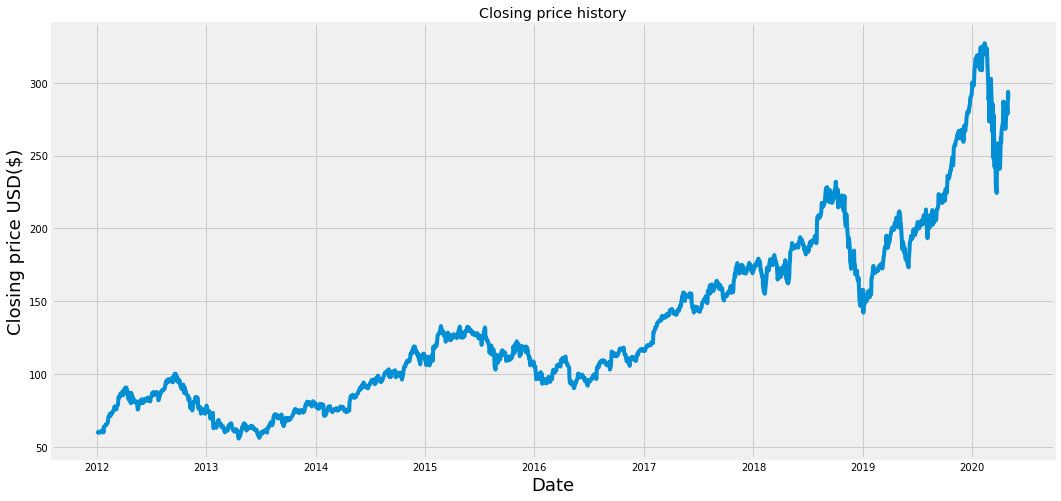

In [4]:
# Viusalise the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing price USD($)',fontsize=18)
plt.show();

In [5]:
# Create a new data frame with only the close column
data = df.filter(['Close'])
# Convert the data frame to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

1677

In [6]:
# Scale the data(Preprocessing / Normalisation)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) #Computes the min and max value to be used for scaling and then transforms the dataset

scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.85457426],
       [0.87693886],
       [0.85951143]])

In [7]:
# Create the training dataset
# Create the scaled training data set
train_data = scaled_data[0:training_data_len :]

# Split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60 , len(train_data)):
  x_train.append(train_data[i-60:i,0]) # 0 -59 , past 60 values
  y_train.append(train_data[i,0])      # 61-.. , value that model hast to predict
  if i <=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01

In [0]:
## Convert the x_train and y_train to numpy array
x_train , y_train = np.array(x_train),np.array(y_train)

In [9]:
# Reshape the data (LSTM expects the data to be 3D in the form of number of samples , time steps , features)
x_train = np.reshape(x_train , (x_train.shape[0]  , x_train.shape[1] , 1)) 
x_train.shape

(1617, 60, 1)

In [0]:
## Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences= True , input_shape =(x_train.shape[1],1))) # input shape(no of time sets and no of features)
model.add(LSTM(50 , return_sequences=False)) #Return seq is false cause we wont be using lstm layers for our model.
model.add(Dense(25)) #Densely connceted neural network layer with 25 neurons
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam' , loss='mean_squared_error') #Optimiser is used to improve upon loss function and loss function is used to find out how well the model did on training set

In [12]:
#Train the model
model.fit(x_train,y_train, batch_size=1 , epochs = 1) #Batch size is the total no of training examples present in a single batch and epoch is the no of iteration when the entire dataset is passed forward and backward through in a neural network.


Epoch 1/1
1617/1617 [==============================] - 58s 36ms/step - loss: 7.9104e-04


In [13]:
#Creating the testing data set(Scaled testing data set)
#Creating a new array containing scaled values from index 
test_data = scaled_data[training_data_len - 60 :  , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :] #Values that we want the model to predict
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test

[array([0.50723997, 0.50075528, 0.49902358, 0.50289227, 0.49707082,
        0.49743929, 0.49021771, 0.4898493 , 0.47861168, 0.48159609,
        0.47776427, 0.47577463, 0.46564236, 0.47396922, 0.47297446,
        0.47791162, 0.47647469, 0.48410149, 0.47209017, 0.47754315,
        0.48701225, 0.4966287 , 0.49578129, 0.48668066, 0.4982867 ,
        0.49939205, 0.49784458, 0.49983416, 0.49596547, 0.50141851,
        0.49979734, 0.50042369, 0.50554509, 0.51225084, 0.51000332,
        0.49810246, 0.49416012, 0.49556017, 0.53686302, 0.5585645 ,
        0.5607752 , 0.56475443, 0.55753286, 0.55804868, 0.56405437,
        0.55908033, 0.56401749, 0.56725984, 0.56906525, 0.5804134 ,
        0.59610919, 0.58829814, 0.58675062, 0.5867875 , 0.58840867,
        0.59087726, 0.59743559, 0.60392023, 0.61600526, 0.62355842]),
 array([0.50075528, 0.49902358, 0.50289227, 0.49707082, 0.49743929,
        0.49021771, 0.4898493 , 0.47861168, 0.48159609, 0.47776427,
        0.47577463, 0.46564236, 0.47396922, 0.

In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1));# Reshape the data to be 3-dimensional in the form [number of samples, number of time steps, and number of features]. This needs to be done, because the LSTM model is expecting a 3-dimensional data set.

In [0]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [17]:
#Getting the RMSE(Root mean squared error). Its a good measure of how accurate the model predicts the response , the lower value of RMSE, the better is the model/fit.
rmse= np.sqrt(np.mean(predictions - y_test)**2)
rmse

7.856006631418743

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


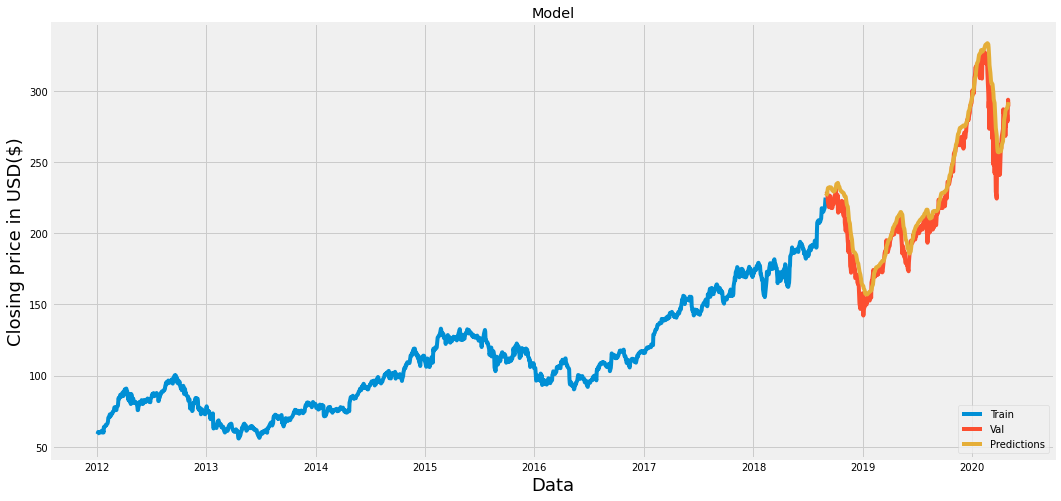

In [18]:
#Plot the data
train = data[0:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Data",fontsize=18)
plt.ylabel("Closing price in USD($)",fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show();

In [19]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-31,227.630005,226.254150
2018-09-04,228.360001,227.813492
2018-09-05,226.869995,229.449692
2018-09-06,223.100006,230.889923
2018-09-07,221.300003,231.812653
...,...,...
2020-04-27,283.170013,287.902466
2020-04-28,278.579987,288.765564
2020-04-29,287.730011,289.303223


In [22]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-05-16')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[316.81732]]


In [24]:
#Get the actual price
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-05-16', end='2020-05-16')
print(apple_quote2['Close'])

Date
2020-05-15    307.709991
Name: Close, dtype: float64
